Replicate Policy Impact in KW94 page 667:
"a 500 dollar per-perod subsidy assuming data set one paramters increases schooling by 1.44 periods"

In [1]:
%matplotlib inline
import json
import numpy as np
import respy as rp

from python.mc_uncertainty_propagation import mc_uncertainty_propagation
from python.model_wrapper import model_wrapper_kw_94
from python.distplot import distplot
from python.convergence_plot import convergence_plot

In [2]:
params, options = rp.get_example_model("kw_94_one", with_data=False)

In [3]:
params

value  lower  upper  \
category    name                                                 
delta       delta                          0.950    0.7    1.0   
wage_a      constant                       9.210    NaN    NaN   
            exp_edu                        0.038    NaN    NaN   
            exp_a                          0.033    NaN    NaN   
            exp_a_square                  -0.050    NaN    NaN   
            exp_b                          0.000    NaN    NaN   
            exp_b_square                   0.000    NaN    NaN   
            hs_graduate                    0.000    NaN    NaN   
            co_graduate                    0.000    NaN    NaN   
            period                         0.000    NaN    NaN   
            is_minor                       0.000    NaN    NaN   
            any_exp_a                      0.000    NaN    NaN   
            work_a_lagged                  0.000    NaN    NaN   
nonpec_a    constant                       0.000    NaN    NaN   
            not_exp_a_lagged               0.000    NaN    NaN   
            not_any_exp_a                  0.000    NaN    NaN   
            hs_graduate                    0.000    NaN    NaN   
            co_graduate                    0.000    NaN    NaN   
wage_b      constant                       8.480    NaN    NaN   
            exp_edu                        0.070    NaN    NaN   
            exp_a                          0.022    NaN    NaN   
            exp_a_square                  -0.050    NaN    NaN   
            exp_b                          0.067    NaN    NaN   
            exp_b_square                  -0.100    NaN    NaN   
            hs_graduate                    0.000    NaN    NaN   
            co_graduate                    0.000    NaN    NaN   
            period                         0.000    NaN    NaN   
            is_minor                       0.000    NaN    NaN   
            any_exp_b                      0.000    NaN    NaN   
            work_b_lagged                  0.000    NaN    NaN   
nonpec_b    constant                       0.000    NaN    NaN   
            not_exp_b_lagged               0.000    NaN    NaN   
            not_any_exp_b                  0.000    NaN    NaN   
            hs_graduate                    0.000    NaN    NaN   
            co_graduate                    0.000    NaN    NaN   
nonpec_edu  constant                       0.000    NaN    NaN   
            is_return_not_high_school  -4000.000    NaN    NaN   
            is_return_high_school      -4000.000    NaN    NaN   
            period                         0.000    NaN    NaN   
            is_minor                       0.000    NaN    NaN   
            hs_graduate                    0.000    NaN    NaN   
            co_graduate                    0.000    NaN    NaN   
nonpec_home constant                   17750.000    NaN    NaN   
            is_young_adult                 0.000    NaN    NaN   
            is_adult                       0.000    NaN    NaN   
            hs_graduate                    0.000    NaN    NaN   
            co_graduate                    0.000    NaN    NaN   
shocks      sd_a                           0.200    NaN    NaN   
            sd_b                           0.250    NaN    NaN   
            sd_edu                      1500.000    NaN    NaN   
            sd_home                     1500.000    NaN    NaN   
            corr_b_a                       0.000    NaN    NaN   
            corr_edu_a                     0.000    NaN    NaN   
            corr_edu_b                     0.000    NaN    NaN   
            corr_home_a                    0.000    NaN    NaN   
            corr_home_b                    0.000    NaN    NaN   
            corr_home_edu                  0.000    NaN    NaN   
meas_error  sd_a                           3.000    0.0    NaN   
            sd_b                           3.000    0.0    NaN   

                

In [4]:
expected_qoi = model_wrapper_kw_94(params["value"].to_numpy())

In [5]:
expected_qoi

1.5417500000000004

In [6]:
#mean_vector = params["value"].to_numpy()
#cov_matrix = np.zeros((len(mean_vector), len(mean_vector)))

In [7]:
#qoi_list = mc_uncertainty_propagation(mean_vector, cov_matrix, 30, save_json=True)

In [8]:
#qoi_list

In [9]:
with open("json/qoi.json", "r") as read_file:
    qoi = json.load(read_file)

In [16]:
with open("json/cov_list.json", "r") as read_file:
    cov_list = json.load(read_file)

In [17]:
cov = np.array(cov_list).reshape(len(params), len(params))

In [18]:
cov

array([[0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 2.56e-06, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 2.56e-08, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [11]:
len(qoi)

30

<module 'matplotlib.pyplot' from 'C:\\Users\\Tobias\\AppData\\Local\\conda\\conda\\envs\\uq\\lib\\site-packages\\matplotlib\\pyplot.py'>

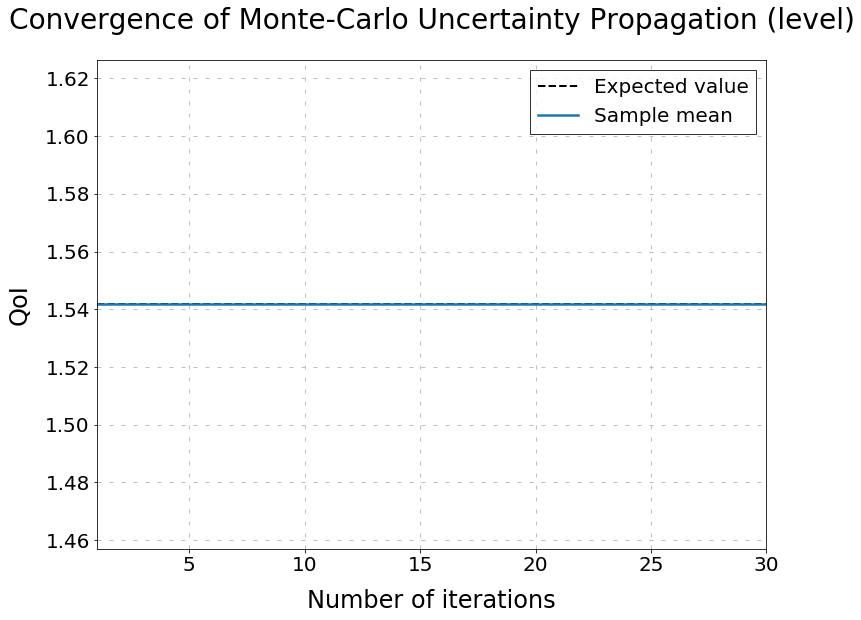

In [12]:
convergence_plot(qoi, expected_qoi, "QoI")

<module 'matplotlib.pyplot' from 'C:\\Users\\Tobias\\AppData\\Local\\conda\\conda\\envs\\uq\\lib\\site-packages\\matplotlib\\pyplot.py'>

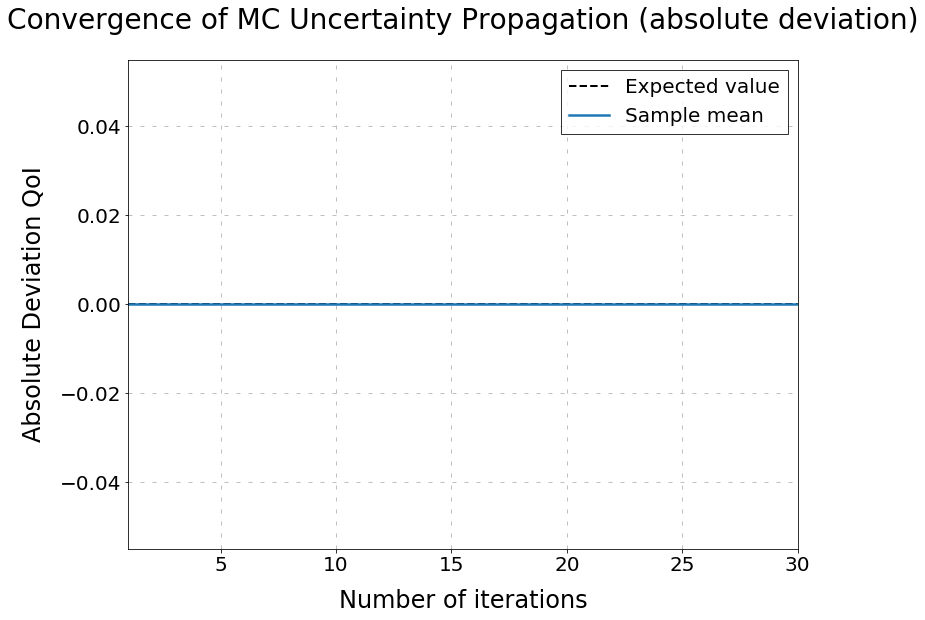

In [13]:
convergence_plot(qoi, expected_qoi, "Absolute Deviation QoI", absolute_deviation=True)

C:\Users\Tobias\AppData\Local\conda\conda\envs\uq\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Tobias\AppData\Local\conda\conda\envs\uq\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


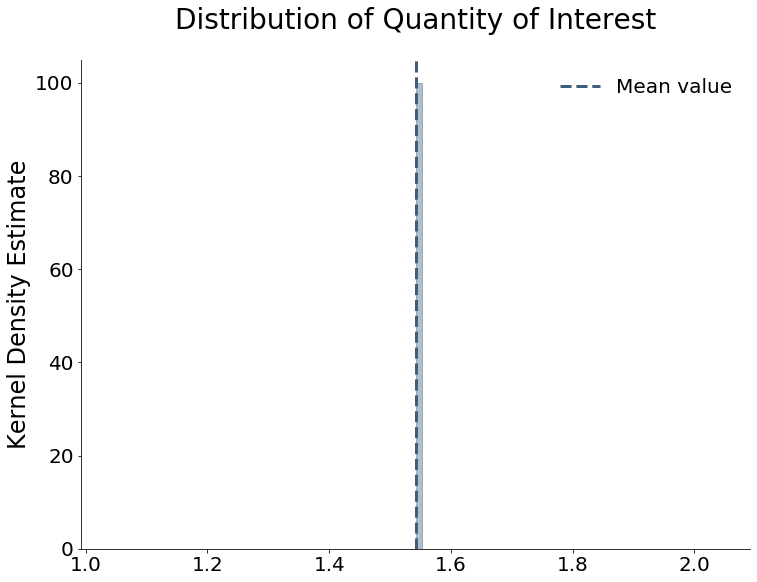

In [14]:
distplot(qoi)